# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 8</span>

## Particella quantistica in una dimensione (1D)

### Obiettivo

In questa esercitazione si applicano tecniche di **campionameno stocastico** a calcoli di natura **quantistica**. 

In particolare il sistema studiato è quello di una **singola** particella quantistica in una dimensione spaziale (**1D**) confinata da un potenziale esterno:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
Di questo sistema si intende calcolare l'energia di **Ground State**, ovvero il valore di aspettazione dell'hamiltoniana sulla funzione d'onda che descrive lo stato fondamentale della particella quantistica unidmensionale vincolata dal potenziale esterno V. Tale problema non è risolvibile per via analitica. Verranno, infatti, introdotti metodi Monte Carlo quantistici, adatti per trovare soluzioni di tipo numerico, quali:

1) Variational Monte Carlo (VMC)

2) Path Integral Monte Carlo (PIMC) con $T>0$

3) Path Integral Ground State (PIGS) con $T=0$

Infine i risultati ottenuti con queste tecniche differenti , che sfruttano il campionamento di densità di probabilità realizzato con l'agoritmo di **Metropolis**, verranno *confrontati* per sottolinearne analogie e differenze.

### Esercizi 8.01-8.02:  Variational Monte Carlo (VMC)

Il **principio variazionale** afferma che, dato un modello hamiltoniano, presa una qualunque **funzione d'onda di prova** (o tentativo) $\Psi_T(x)$ il valore di aspettazione dell'energia su tale funzione, che viene detto **energia variazionale** $E_T$ , è maggiore uguale al valore di aspettazione sullo stato fondamentale: 
$$
E_T = \langle {\hat H} \rangle_T = \frac{\langle \Psi_T| {\hat H} | \Psi_T\rangle}
{\langle \Psi_T| \Psi_T\rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$
dove il valore minimo delle'energia variazionale coincide con l'energia di GS se la $\Psi_T(x)$ = $\Psi_0(x)$.

Il metodo varazionale consiste nell'usare una **famiglia** di funzioni d'onda di prova parametrizzate da un'insieme di **parametri variazionali** e *ottimizzare* questi ultimi per *minimizzare* l'energia variazionale del sistema ottenendo una buona **approssimazione** del Ground State. Dalla funzione tentativo ottimizzata si possono studiare proprietà approssimate dello stato fondamentale. 

Come modello approssimato del GS del sistema studiato in questa esercitazione è stata proposta la seguente funzione d'onda di prova:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
proporzionale alla **somma di due Gaussiane** centrate rispettivamente in $\pm\mu$ e di larghezza (deviazione standard) $\sigma$, con $\mu$ e $\sigma$ parametri variazionali da ottimizzare. Si noti che la funzione d'onda suggerita è simmetrica, come è atteso, data la stessa natura simmetrica del potenziale esterno che confina il sistema che è pari.

A questo punto il metodo **Monte Carlo Variazionale** per una singola perticella quantistica in una dimensione sfrutta l'algoritmo di Metropolis per campionare il modulo quadro di una funzione d'onda tentativo $|\Psi_T(x)|^2$ usando una probabilità di transizione uniforme $T(x_{new}|x_{old})$ centrata sulla vecchia configurazione (posizione) e di ampiezza delta. 
In questo modo è possibile determinare il valore di aspettazione dell'hamiltoniana valutando un integrale monodimensionale come per qualunque altro metodo MC:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$
dove nel terzo passggio si è moltiplicato e diviso per la funzione d'onda di prova e $E_{loc}(x) = \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$ viene detta **energia locale**.

Ripetendo il campionaemtno e la simulazione Monte Carlo è possibile ottimizzare i parametri per minimizzare $\langle {\hat H} \rangle_T$.

Per scrivere il codice C++ che implementi il VMC è stata ereditata la medesima struttura del programma della precedente esercitazione che simulava un sistema di Lennard-Jones nell'ensemble canonico NVT con l'algoritmo di Metropolis che campionava il peso statistico di Boltzmann. 

In questo caso il Metropolis campiona un modulo quadro di una funzione d'onda, interpertabile come una densità di probabilità (si ricordi che tale tecnica permette di non considerare la normalizzazione che si semplifica nel calcolo della probabilità di accettazione) proponendo una mossa con una transizione uniforme di ampiezza delta. La nuova coordinata generata potrà essere accetata, e viene campionata, oppure in caso contrario viene ricampionata la configurazione di partenza. Iterando questo procedeimrnto, in breve tempo e asintoticamente, viene realizzato il corretto campionamento della densità di probabilità.

Quello che è stato appena descritto rappresenta il cuore del programma. Quest'ultimo, entrando più nello specifico, viene inizializzato, mediante la routine *Input()*, leggendo il valore di alcuni parametri importanti per la simulazione dal file *input.dat*, quali: 

1) I due parametri variazionali da ottimizzare $\mu$ e $\sigma$.

2) la configurazione o posizione iniziale da cui parte il campionamento, $start_{position} = 0.0$, scelta coincidente con l'origine per rendere efficiente il processo di equilibrazione, in termini di costo computazionale.

3) L'ampiezza della transizione uniforme, $delta = 5.4$ , il cui valore è stato settato in modo da soddisfare la regola empirica del 50% per la probabilità di accettazione del Metropolis.

4) il numero di passi MC necessari per l'equilibrazione del sistema , $N_{equi} = 3000$, il numero di blocchi, $N_{blk} = 100$ e il numero di steps per ciascun blocco, $N_{steps} = 5000$.

5) I parametri per l'istogramma riempito con le configurazioni campionate, $nbins = 100 $ numero dei bins, $histogram_{start} = -3$ e $histogram_{end} = 3$ il dominio dell'istogramma.

Per effettuare la misura (routine *Measure()*) dell'osservabile energia locale, come dedotto dalle formule precedenti, bisogna applicare l'hamiltoniana , che è la somma di un termine cinetico e uno potenziale, alla funzione d'onda tentativo. In rappresentazione delle coordinate questo significa (si noti che il programma lavora in unità di $h_{bar} = 1$ e $ m =1 $) applicare il laplaciano (che in una dimensione coincide con la derivata seconda rispetto a x) alla funzione d'onda e sommare al contributo cinetico la banale moltiplicazione del potenziale esterno V e della funzione d'onda di prova:
$$
E_{loc}(x) = \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{({-\frac{d^2}{dx^2} + V(x)}) \Psi_T(x)}{\Psi_T(x)} = \frac{-\Psi_T^{''}(x) + V(x)\Psi_T(x)}{\Psi_T(x)}
$$

Per tale motivo nel programma sono state incluse delle classi (olltre alla classe *Random* per generare numeri casuali) che permettono di valutare il potenziale esterno, la funzione d'onda di prova e la derivata seconda della $\Psi_T(x)$ nella coordinata x. La classe madre astratta *FunzioneBase* consta di due metodi virtual *Eval* e *EvalDerSec* da implementare obbligattoriamente nelle classi figlie *Potential* e *TrialWaveFunction*.

Una volta effettuata la singola misura i valori vengono accumulati per essere mediati sugli step della simulazione ed usando la tecnica del **data blocking** si ottengono le stime dell'energia variazionale $\langle {\hat H} \rangle_T$ con le realtive incertezze statistiche in funzione del numero di blocchi (o degli steps MC della simulazione) fissati i parametri della funzione d'onda tentativo che minimizzano la variabile di interesse.

Per ottenere tali parametri il sistema è stato simulato più volte, variandoli in modo sistematico lungo la direzione che minimizzava l'energia variazionale fino a trovarne un minimo. Per scegliere dei valori ragionevoli di partenza è stato osservato il risultato numerico ottenuto con la tecnica di fattorizzazione della funzione d'onda descritta nel materiale supplementare. 

I parametri ottimizzati scelti che minimizzano l'energia varazionale sono : $\mu = 0.81$ e $\sigma = 0.62$.

Qui di seguito vengono riportati due grafici che mostrano il processo di equilibrazione e la simulazione con le stime di $\langle {\hat H} \rangle_T$ con le scelte dei parametri variazionali sopra indicate.  

The first parameter: 0.81
The second parameter: 0.62


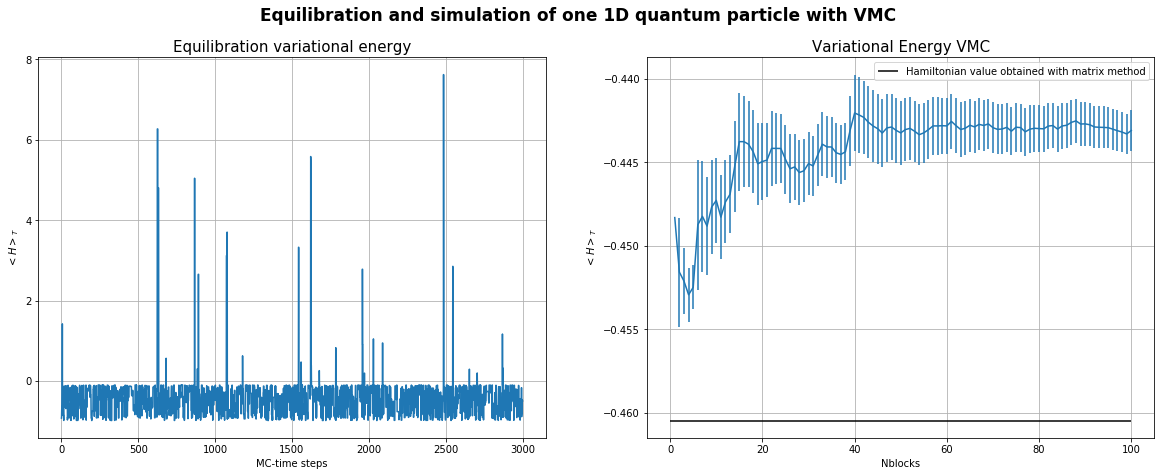

Ground state variational energy: -0.4431 +/- 0.0012


In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#The Variational Monte Carlo method uses a trial wave function: Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}} + e^{-\frac{(x+\mu)^2}{2\sigma^2}}$)

#optimized parameters
mu = 0.81
sigma = 0.62

print ('The first parameter:' , mu)
print ('The second parameter:' , sigma)

x1, ham_equi = np.loadtxt("Results/output.expection_values_hamiltonian_equi", usecols=(0,1), unpack='true')
Nblocks, ham_exp_val, error_ham_exp_val = np.loadtxt("Results/output.expection_values_hamiltonian", usecols=(0,2,3), unpack='true')

fig=plt.figure(figsize=(20,7))
plt.suptitle("Equilibration and simulation of one 1D quantum particle with VMC", fontsize='17', weight='bold')

# equilibration

plt.subplot(121)
plt.plot(x1,ham_equi)
plt.title("Equilibration variational energy", size = '15')
plt.xlabel('MC-time steps')
plt.ylabel('$<H>_T$')
plt.grid(True)

# Variational Monte Carlo

plt.subplot(122)
plt.errorbar(Nblocks,ham_exp_val,yerr = error_ham_exp_val)
plt.title("Variational Energy VMC", size = '15')
plt.hlines(-0.46046587969271535, 0, Nblocks.size,label='Hamiltonian value obtained with matrix method') # supplementary material
plt.xlabel('Nblocks')
plt.ylabel('$<H>_T$')
plt.grid(True)
plt.legend()

plt.show()

print ("Ground state variational energy:", round(ham_exp_val[Nblocks.size-1],4), '+/-',  round(error_ham_exp_val[Nblocks.size-1],4))

- Dal plot sulla sinistra si osserva che l'**equilibrazione** del sistema è immediata, dopo poche decine di time steps, e nonostante alcuni picchi, i valori istantanei di energia variazionale oscillano intorno a $-0.5$.


- Dal secondo plot sulla destra si osserva una convergenza del valore di aspettazione dell'hamiltoniana sullo stato fondamentale approssimato dalla funzione d'onda tenetivo ottimizzata intorno al valore $\langle {\hat H} \rangle_T \simeq -0.443$ che è leggermente maggiore (di due centesimi di unità) rispetto al'energia del ground state ottenuta con la tecnica numerica alternativa che si basa sulla trasformazione dell'equazione di Schrodinger in un'equazione matriciale. Questo perchè il *guess* variazionale esatto della funzione d'onda tentivo non corrisponde esattamete alla somma di due gaussiane. Di conseguenza, seppur i risultati ottenuti sono più che soddisfacenti ed *esatti* nel senso che danno valori di $E_t$ associando incertezze statistiche del calcolo Monte Carlo, quanto sopra osservato indica un limite del VMC, che dipende dalla scelta della funzione d'onda di prova, che può essere superato da altri metodi Monte Carlo come il PIGS che sarà soggeto della prossima sezione.

Il codice c++ che implementa il VMC contiene inoltre delle istruzioni per mostrare l'andamento $|\Psi_T(x)|^2$ del GS approssimato riempendo un **istogramma** con le configurazioni campionate dal metropolis, seguendo la medesima struttura usata per plottare la funzione di ditribuzione radiale $g(r)$ della scorsa esercitazione. 

Scegliendo un'opportuno dominio per l'istogramma $ x \in [-3,3]$ e dividendolo negli nbins di dimensione $ binsize = \frac{{histogram}_{start}-{histogram}_{end}}{nbins}$, il programma **incrementa** di un'unità il bin a cui è associato l'intervallo in cui cade, ad ogni step MC, la nuova posizione campionata dal metropolis.

Con la tecnica del data blocking e ricordandosi infine di dividere per un'opportuno **coefficiente di normalizzazione** (l'area sottesa dal grafico) si ottiene il grafico che mostra il modulo quadro della funzione d'onda in funzione della coordinata spaziale x.

Qui di seguito è riportato tale plot confrontato con la soluzione numerica $|\Psi_T(x)|^2$ ottenuta usando il metodo del materiale supplementare.

1D quantum particle system confined by the external potential $V(x) = x^4 + (5/2)x^2$ 
Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


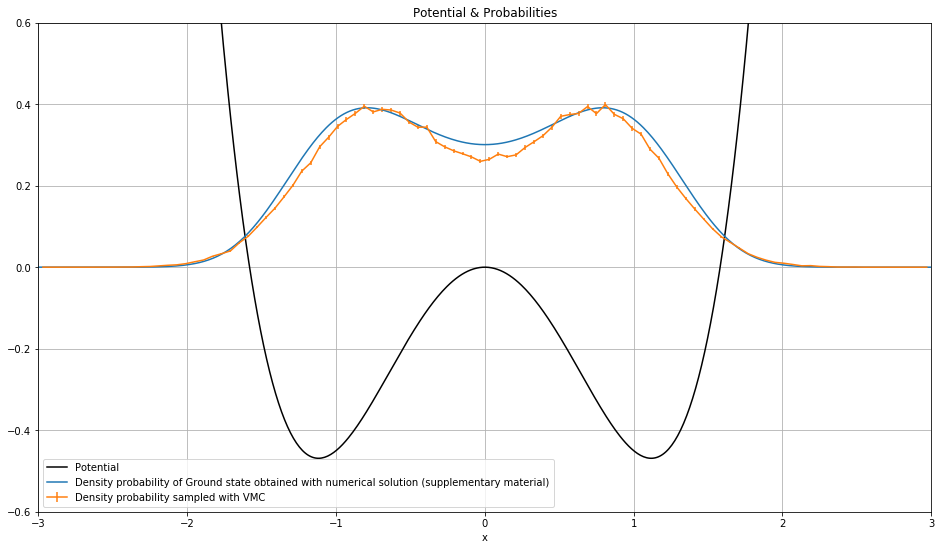

In [27]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print ("1D quantum particle system confined by the external potential $V(x) = x^4 + (5/2)x^2$ ")

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

x_pos_VMC, prob_VMC , error_Prob_VMC = np.loadtxt("Results/probabilityVMC.dat", usecols=(0,1,2), unpack='true')

# Plot a few things
plt.figure(figsize=(16,9))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label = "Density probability of Ground state obtained with numerical solution (supplementary material)") 
#plt.plot(x,(psi[1])**2,label = "Density probability of 1st excited state obtained with numerical solution SM")
#plt.plot(x,(psi[2])**2, label = "Density probability of 2nd excited state obtained with numerical solution SM")
plt.errorbar(x_pos_VMC, prob_VMC , yerr = error_Prob_VMC, label = "Density probability sampled with VMC")

plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()


- Il confronto tra le due densità di probabilità mostra che il metodo variazionale non riproduce fedelmente lo stato fondamentale della singola particella quantistica confinata in un potenziale esterno V(x) perchè la funzione d'onda tentativo con i parametri ottimizzati approssima solamente quella di ground state. L'**inesatta equivalenza** statistica riscontrata conferma nuovamente che il *guess* variazionale ipotizzato non descrive esattamente lo stato fondamentale del sistema pur ottimizzando al meglio i parametri, ma spesso il **VMC** è un utile *tool*, in prima approssimazione, per studiare le proprietà del GS di un sistema in assenza di soluzioni analitiche o di metodi di campionamento stocastico più fini.

### Esercizi 8.03:  Path Integral Monte Carlo (PIMC) and Path Integral Ground State (PIGS)

Nell'ambito della **meccanica statistica quantistica** non si ha una conoscenza completa della preparazione del sistema quantistico, ovvero si conoscono solo delle probabilità *classiche* $\rho_i$, che dipendono dall'operazione stessa di preparazione, di trovare il sistema in uno specifico microstato $|\Psi_i\rangle$. Se si conoscesse il microstato esatto in cui si trova il sistema meccanico quantistico allora si avrebbe la preparazione di un cosiddetto **stato puro**, al contrario, se il sistema fosse stato predisposto secondo una **miscela statistica di microstati** con le relative probabilità associate si parlerebbe di **stato miscela**.
Entrambi gli stati sono caratterizzati univocamente e completamente descritti dagli elementi di matrice dell'**operatore densità** che consente di calcolare qualsiasi media di Ensemble statistica quantistica per qualsivoglia osservabile.

Qui di seguito si indicono le definizioni matematiche di:

1) Operatore statitistico di densità e dei suoi elemetni di matrice in una base arbitaria $|\Phi_k\rangle$:
$$
{\hat \rho} = \sum_{k k'} \langle\Phi_{k'}| \rho_{kk'} |\Phi_k\rangle   
$$
$$
\rho_{kk'} := \langle\Phi_{k'}|{\hat \rho}|\Phi_k\rangle
$$

2) Valore di aspettazione di un osservabile ${\hat A}$ arbitraria in meccanica statistica quantistica 
$$
\langle {\hat A} \rangle = \sum_{k k'} \rho_{kk'} \langle\Phi_{k'}|{\hat A}|\Phi_k\rangle = Tr({\hat \rho}{\hat A})
$$

Nel caso di una miscela statistica ottenuta preparando il sistema a fissata temperatura, volume e pressione, la probabilità $\rho_n$ di trovare il sistema in certo microstato con autovaleore di energia $E_n$ corrispondente all'autostato dell'hamiltoniana $|\Psi_i\rangle$ è data dal classico **peso di Boltzmann** $\rho_n  = \frac{e^{-\beta E_n}}{\sum_n e^{-\beta E_n}}$  e l'operatore densità, detto canonico, ha la stessa espressione del peso una volta sostituito l'autovalore $E_n$ con l'operatore energia hamiltoniano e la sommatoria con la traccia ${\hat H}$:  
$$
{\hat \rho}_{canonico}  = \frac{e^{-\beta {\hat H}}}{Tr(e^{-\beta {\hat H}})}
$$

La miscela statistica così preparata è detta **insieme canonico** e il suo operatore densità può essere sfruttato per calcolare le medie statistiche quantistiche e i valori di aspettazione del sistema in esame.



#### Path Integral Ground State (PIGS) , T  = 0

Per calcolare valori di aspettazione "esatti" di un operatore su una stato fondamentale ignoto $|\Psi_0\rangle $ è possibile usare altri Metodi Monte Carlo via integrazione sui cammini. Tutti i metodi Monte Carlo *esatti* cosidetti a **temperatura nulla** usati per approssimare stati puri (associati allo stato fondamentale) sono sviluppati a partire dalla **propagazione per tempi immaginari** di stati quantistici.

L'idea chiave che sta alla base di questi metodi MC **proiettivi** è che lo stato fondamentale aprrossimato può essere interpretato come la propagazione per tempi immaginari di uno stato variazionale di prova di partenza. La propagazione per tempi immaginari è realizzata dal cosidetto **propagatore** (una funzione di Green):

$$
G(\vec{r},\vec{r'},\tau) = \langle \vec{r} | e^{-\tau {\hat H}} | \vec{r'} \rangle
$$

una matrice densità in rappresentazione delle coordinate, non normalizzata, off-diagonal (a differenza di quella diagonale usata nelle medie termiche), che rappresenta delle probabilità di transizione, con $\tau$ che indica il tempo immaginario.
L'effetto di tale propagazione su uno stato iniziale di prova è quello, per tempi immaginari sufficientemente lunghi, di approssimare lo stato fondamentale secondo una convergenza esponenziale.

Da queste considerazioni, sfruttando la decomposizione di Trotter e la rappresentazione per gli integrali sui cammini, si realizza il metodo MC di integrazione dei cammini su stato fondamentale ($T=0$). Assumendo che il tempo $\tau$ sia finito, per quanto elevato, e applicando l'approssimazione primitiva per separare il contributo cinetico da quello potenziale dell'operatore hamiltoniano nel propagatore , le medie "esatte" sullo stato fondamentale risultano equivalenti alle medie canoniche di un sistema classico costituito da polimeri speciali lineari (quindi aperti) interagenti.

Il mapping permette di trattare un insieme di particelle quantistiche interagenti come un sistema di polimeri lineari aperti, di cui i gradi di libertà appartenenti alla stessa catena polimerica sono legati da un'interazione di tipo armonico, che deriva dalla parte cinetica del propagatore campionabile in maniera esatta con un Moto Browniano, e i gradi libertà che occupano i siti corrispondenti delle diverse catene polimeriche sono legati da un'interazione dovuta al termine potenziale del propagatore campionabile mediante l'algoritmo di Metropolis realizzando un processo di Markov. 

Si noti che gli estremi della catena, che non si chiude (poichè la matrice densità è off-diagonal), hanno un peso statistico alterato dalla funzione d'onda di prova che deve essere *proiettata* sullo stato fondamentale. 

Simulando un siffato sistema si ottengono medie di ensemble compatibili, in maniera praticamente "esatta", con le i valori di aspettazione sullo stato fondamentale.

Tornando al sistema di una singola particella quantistica confinata in un potenziale esterno è possibile effettuare una simulazione *quantum Monte Carlo* di stato fondamentale, cioè a temperatura nulla, per risolvere in modo "esatto" il sistema  sfruttando un codice che implementa l'algoritmo PIGS, in due condizioni differenti, ossia proiettando rispettivamente sullo stato fondamentale ignoto:

1) una funzione d'onda di prova **costante** $\Psi_T(x)=1$

2) la funzione d'onda tentativo usata in precedenza con i parametri ottimizzati $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$

Quello che ci si aspetta è che la funzione d'onda costante, molto lontana e diversa dallo stato fondamentale esatto, necessiti di una propagazine per tempi immaginari più lunghi rispetto alla seconda proposta prima che campioni effettivamente il moto di punto zero e risulti effettivamente *proiettata* sul GS.

Nel codice fornito che implementa l'algoritmo vengono solo modificate le espressioni che descrivono il potenziale esterno e la funzione d'onda di prova insieme alle relative derivate fino al secondo ordine.

Entrare nel dettaglio del codice, molto complesso, sarebbe lungo e probabilmente inefficace. L'unico aspetto che si intende sottolineare, che rende il campionamento parecchio efficiente, è che il Metropolis campiona in effetti solo il peso statistico associato al termine potenziale del propagatore, mentre la parte cinetica della matrice di densità, che è un nucleo stocastico o una cosidetta matrice di probabilità di transizione gaussiana, tipica del Moto Browniano, può essere campionata in modo esatto. In pratica si sta eseguendo **Importance sampling** sul metropolis.

Gli esiti ottenuti con il metodo **PIGS** per entrambe le funzioni di prova proiettate vengono confrontati, qui di seguito,con i risultati ricavati con il metodo **VMC** e con l'altra tecnica numerica (materiale supplemenatre) riportando le densità di probabilità intese come modulo quadro della funzione d'onda di prova , $|\Psi_T(x)|^2$, che approssima lo stato fondamentale esatto, campionandola con il Metropolis.


1D quantum particle system confined by the external potential $V(x) = x^4 + (5/2)x^2$ 
The first parameter: 0.81
The second parameter: 0.62
Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


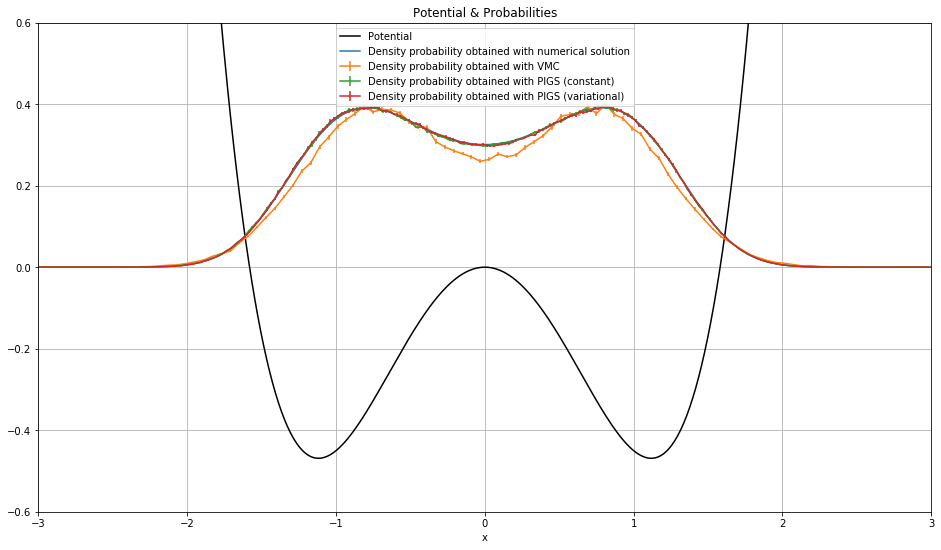

In [29]:
print ("1D quantum particle system confined by the external potential $V(x) = x^4 + (5/2)x^2$ ")

print ('The first parameter:' , mu)
print ('The second parameter:' , sigma)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

#file di output : probability_PIGS_gauss(constant)_(number).dat , where number = imaginary propagation time

x_pos_PIGS_gauss_8, prob_PIGS_gauss_8 , error_prob_PIGS_gauss_8 = np.loadtxt("Results/probability_PIGS_gauss_8.dat", usecols=(0,1,2), unpack='true')
x_pos_PIGS_constant_8, prob_PIGS_constant_8 , error_prob_PIGS_constant_8 = np.loadtxt("Results/probability_PIGS_constant_8.dat", usecols=(0,1,2), unpack='true')
#x_pos_PIMC, prob_PIMC , error_Prob_PIMC = np.loadtxt("probabilityPIMC.dat", usecols=(0,1,2), unpack='true')

# Plot a few things
plt.figure(figsize=(16,9))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label = "Density probability obtained with numerical solution") 
#plt.plot(x,(psi[1])**2,label = "Density probability of 1st excited state obtained with numerical solution SM")
#plt.plot(x,(psi[2])**2, label = "Density probability of 2nd excited state obtained with numerical solution SM")
plt.errorbar(x_pos_VMC, prob_VMC , yerr = error_Prob_VMC, label = "Density probability obtained with VMC")

# costant variational wave function
plt.errorbar(x_pos_PIGS_gauss_8, prob_PIGS_gauss_8 , yerr = error_prob_PIGS_gauss_8, label = "Density probability obtained with PIGS (constant)")
# parametrized (mu and sigma) variational wave function
plt.errorbar(x_pos_PIGS_constant_8, prob_PIGS_constant_8 , yerr = error_prob_PIGS_constant_8 , label = "Density probability obtained with PIGS (variational)")

#plt.errorbar(x_pos_PIMC, prob_PIMC , yerr = error_Prob_PIMC, label = "Density probability obtained with PIMC (parameters)")

plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

- Dal grafico sopra riporato si osserva una perfetta compatibilità ed equivalenza statistica fra $|\Psi_T(x)|^2$ per entrambe le funzioni d'onda tentativo, nonostante quella costante necessiti di una propagazione per tempi immaginari maggiore per *ripulirsi* di tutte le sovrapposizioni che ha con gli stati eccitati, come viene mostrato qui di seguito in un plot che riporta l'energia potenziale in funzione delle *timeslices*, ovvero del tempo di propagazione. 

- Si ricordi che la densità di probabilità è stata valutata, riempiendo l'istogramma, nell'intervallo delle timesclices $[120,180]$ sulle $N_{timeslices} = 300$ totali (ossia trenta valori a destra e sinistra rispetto alla metà) perchè in quell'intervallo si è sicuri che la propagazione per tempi immmaginari sia stata sufficientemente lunga da proiettare la funione d'onda di prova sull'esatto moto di punto zero.

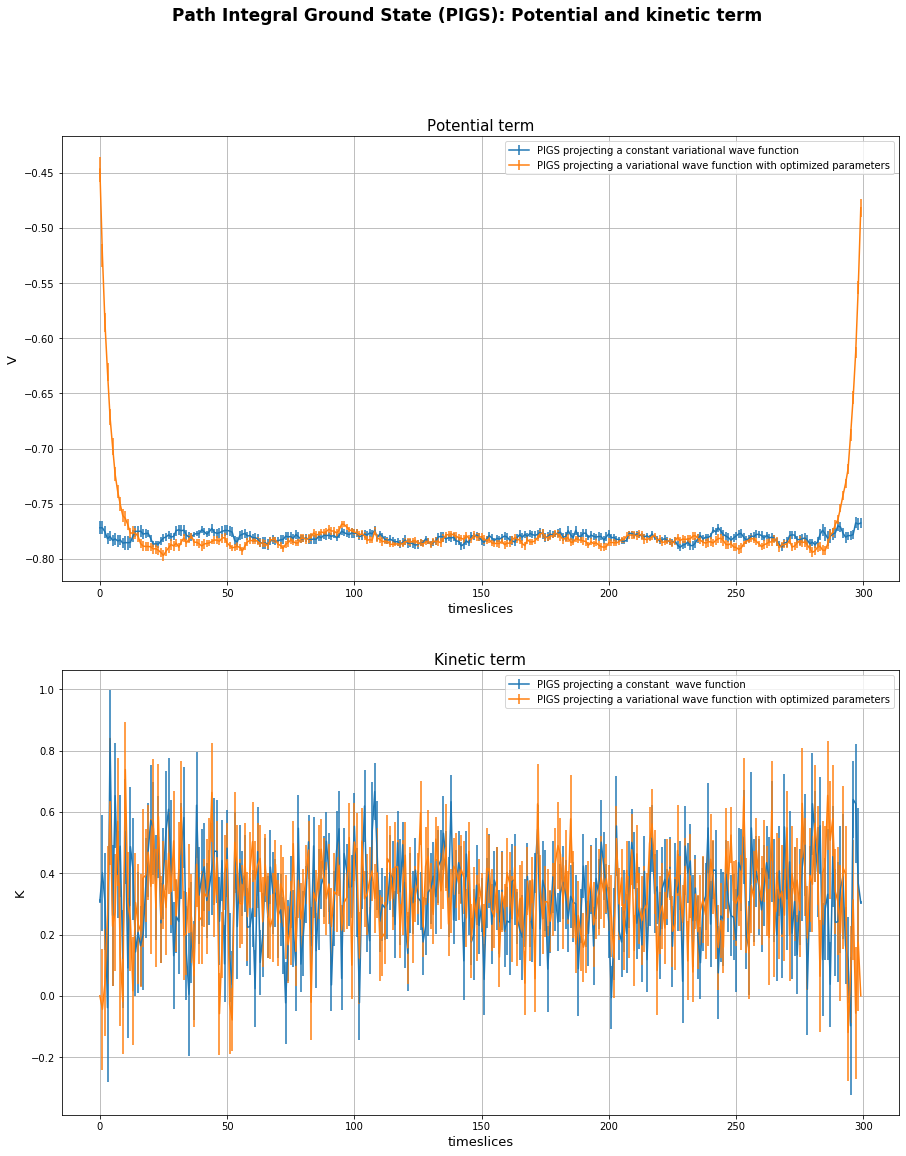

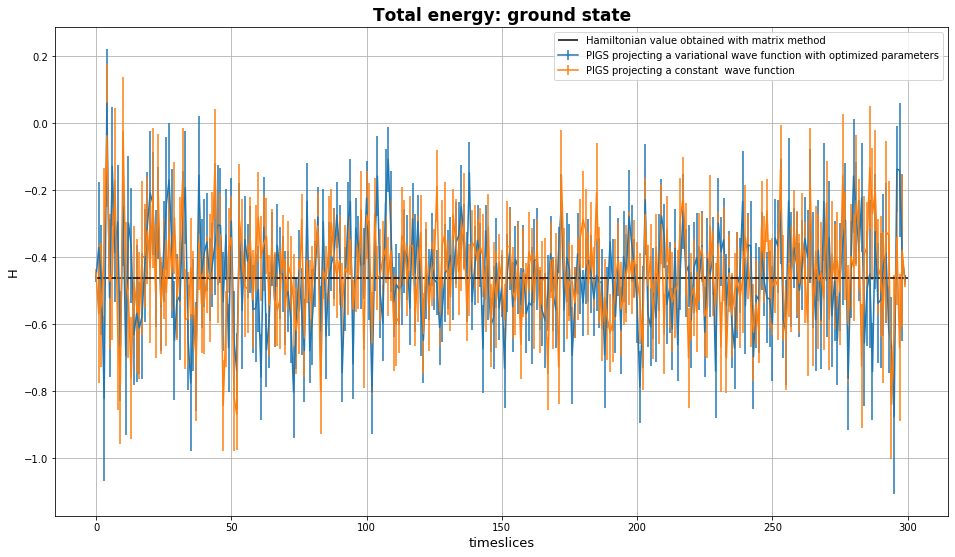

Ground state energy projecting a variational wave function: -0.4626 +/- 0.011
Ground state energy projecting a constant wave function: -0.4467 +/- 0.0058


In [30]:
#potential term
timeslices_PIGS, Pot_PIGS_gauss_8 , error_Pot_PIGS_gauss_8 = np.loadtxt("Results/Potential_PIGS_gauss_8.dat", usecols=(0,1,2), unpack='true')
timeslices_PIGS, Pot_PIGS_constant_8 , error_Pot_PIGS_constant_8 = np.loadtxt("Results/Potential_PIGS_constant_8.dat", usecols=(0,1,2), unpack='true')
# kinetic term
timeslices_PIGS, Kin_PIGS_gauss_8 , error_Kin_PIGS_gauss_8 = np.loadtxt("Results/kinetic_PIGS_gauss_8.dat", usecols=(0,1,2), unpack='true')
timeslices_PIGS, Kin_PIGS_constant_8 , error_Kin_PIGS_constant_8 = np.loadtxt("Results/kinetic_PIGS_constant_8.dat", usecols=(0,1,2), unpack='true')

fig=plt.figure(figsize=(15,18))
plt.suptitle("Path Integral Ground State (PIGS): Potential and kinetic term", fontsize='17', weight='bold')

#potential term
plt.subplot(211)
plt.errorbar(timeslices_PIGS, Pot_PIGS_gauss_8 , yerr = error_Pot_PIGS_gauss_8, label = 'PIGS projecting a constant variational wave function')
plt.errorbar(timeslices_PIGS, Pot_PIGS_constant_8 , yerr = error_Pot_PIGS_constant_8 , label = 'PIGS projecting a variational wave function with optimized parameters')
plt.title("Potential term",size='15')
plt.xlabel('timeslices',size='13')
plt.ylabel('V',size='13')
plt.grid(True)
plt.legend()

# kinetic term
plt.subplot(212)
plt.errorbar(timeslices_PIGS, Kin_PIGS_gauss_8 , yerr = error_Kin_PIGS_gauss_8, label = 'PIGS projecting a constant  wave function')
plt.errorbar(timeslices_PIGS, Kin_PIGS_constant_8 , yerr = error_Kin_PIGS_constant_8, label = 'PIGS projecting a variational wave function with optimized parameters')
plt.title("Kinetic term",size='15')
plt.xlabel('timeslices',size='13')
plt.ylabel('K',size='13')
plt.grid(True)
plt.legend()


# total hamiltonian energy
fig=plt.figure(figsize=(16,9))
plt.errorbar(timeslices_PIGS, Kin_PIGS_gauss_8 + Pot_PIGS_gauss_8 , yerr = error_Kin_PIGS_gauss_8 + error_Pot_PIGS_gauss_8, label = 'PIGS projecting a variational wave function with optimized parameters')
plt.errorbar(timeslices_PIGS, Kin_PIGS_constant_8 + Pot_PIGS_constant_8 , yerr = error_Kin_PIGS_constant_8 + error_Pot_PIGS_constant_8, label = 'PIGS projecting a constant  wave function')
plt.title("Total energy: ground state", fontsize='17', weight='bold')
plt.xlabel('timeslices',size='13')
plt.ylabel('H',size='13')
plt.hlines(E[0], 0, 300, label='Hamiltonian value obtained with matrix method')
plt.grid(True)
plt.legend()

plt.show()

print ("Ground state energy projecting a variational wave function:", round(Kin_PIGS_gauss_8[0] + Pot_PIGS_gauss_8[0],4), '+/-',  round(error_Kin_PIGS_gauss_8[0] + error_Pot_PIGS_gauss_8[0],4))
print ("Ground state energy projecting a constant wave function:", round(Kin_PIGS_constant_8[0] + Pot_PIGS_constant_8[0],4), '+/-',  round(error_Kin_PIGS_constant_8[0] + error_Pot_PIGS_gauss_8[0],4))

- Il grafico dell'energia potenziale mostra che la funziona d'onda di prova costante impiega circa 25 intervalli temporali immaginari (timeslices) per mandare esponenzialmente a zero le sovrapposizioni con gli stati eccitati. La compatibilità riscontrata nel grafico precedente resiste fintantochè si considerano un intervallo centrale di timeslices per calcolare le medie statistiche delle osservabili corrispondente ad una zona che viene considerata sufficientemente proiettata sullo stato fondamentale. Nella simulzaione PIGS gli estremi dell'intervallo delle timeslices sono 120  e 180, coerenetemente con quanto appena dichiarato. 


- Dal grafico della parte cinetica, invece, si osserva una consistente oscillazione (soprattutto nei time-slices centrali) ma sempre centrata intorno ad un valore che si colloca nell'intervallo $[0.2,0.4]$.


- Nell'ultimo grafico viene anche riporato il grafico del valore hamiltoniano dell'energia totale, ottenuta sommando il contributo cinetico e quello potenziale e ne viene data una stima sommando i termini in corrispondenza del primo time-slices (potremmo farlo per qualsiasi time-slices dato che l'hamiltoniana commuta con il propagatore).

Inoltre è possibile osservare, nel prossimo grafico, che il tempo di propagazione immaginario minimo che la funzione d'onda di prova variazionale necessita per produrre uno stato evuluto già sufficenetemente proiettato sullo stato fondamentale (si ricordi la convergenza esponenziale) in modo da poter campionare in modo "esatto" le densità di probabilità del GS è molto minore di quello che ha bisogno la funzione d'onda tentativo costante.

Il motivo è sempre riconducibile alla evidente differenza tra la $\Psi_T(x) = 1 $ e il ground state e del tempo che impiega per ripulirsi di tutte le sovrapposizioni con stati eccitati.

1D quantum particle system confined by the external potential $V(x) = x^4 + (5/2)x^2$ 
Ground state energy:  -0.46046587969271535


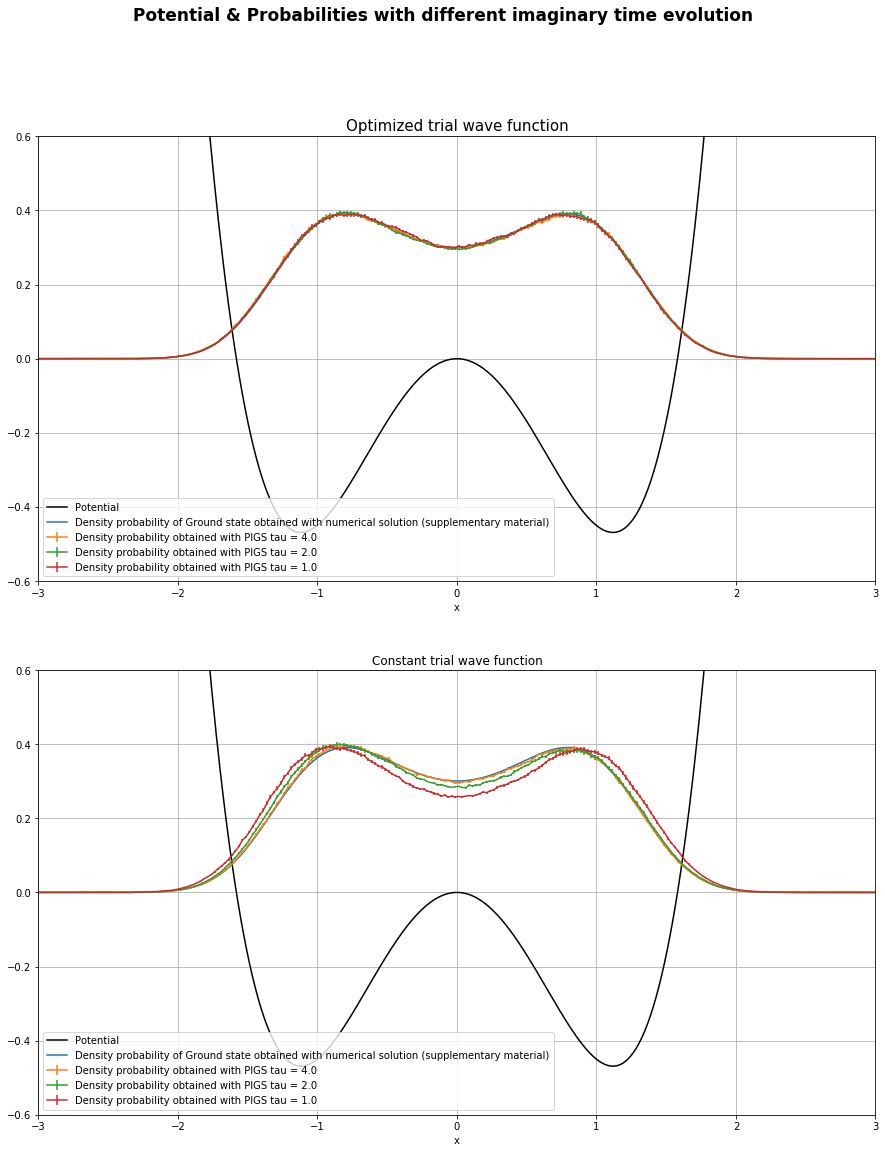

In [37]:
print ("1D quantum particle system confined by the external potential $V(x) = x^4 + (5/2)x^2$ ")

print("Ground state energy: ", E[0])

#optimized WF

#tau = 4.0
x_pos_PIGS_gauss_4, prob_PIGS_gauss_4 , error_prob_PIGS_gauss_4 = np.loadtxt("Results/probability_PIGS_gauss_4.dat", usecols=(0,1,2), unpack='true')
#tau = 2.0
x_pos_PIGS_gauss_2, prob_PIGS_gauss_2 , error_prob_PIGS_gauss_2 = np.loadtxt("Results/probability_PIGS_gauss_2.dat", usecols=(0,1,2), unpack='true')
#tau = 1.0
x_pos_PIGS_gauss_1, prob_PIGS_gauss_1 , error_prob_PIGS_gauss_1 = np.loadtxt("Results/probability_PIGS_gauss_1.dat", usecols=(0,1,2), unpack='true')


x_pos_PIGS_constant_8, prob_PIGS_constant_8 , error_prob_PIGS_constant_8 = np.loadtxt("Results/probability_PIGS_constant_8.dat", usecols=(0,1,2), unpack='true')

fig=plt.figure(figsize=(15,18))
plt.suptitle("Potential & Probabilities with different imaginary time evolution", fontsize='17', weight='bold')

plt.subplot(211)
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label = "Density probability of Ground state obtained with numerical solution (supplementary material)") 
#plt.plot(x,(psi[1])**2,label = "Density probability of 1st excited state obtained with numerical solution SM")
#plt.plot(x,(psi[2])**2, label = "Density probability of 2nd excited state obtained with numerical solution SM")
plt.errorbar(x_pos_PIGS_gauss_4, prob_PIGS_gauss_4 , yerr = error_prob_PIGS_gauss_4 , label = "Density probability obtained with PIGS tau = 4.0")
plt.errorbar(x_pos_PIGS_gauss_2, prob_PIGS_gauss_2 , yerr = error_prob_PIGS_gauss_2, label = "Density probability obtained with PIGS tau = 2.0")
plt.errorbar(x_pos_PIGS_gauss_1, prob_PIGS_gauss_1 , yerr = error_prob_PIGS_gauss_1, label = "Density probability obtained with PIGS tau = 1.0")
plt.title("Optimized trial wave function", size='15')
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()

# constant WF

#tau = 4.0
x_pos_PIGS_constant_4, prob_PIGS_constant_4 , error_prob_PIGS_constant_4 = np.loadtxt("Results/probability_PIGS_constant_4.dat", usecols=(0,1,2), unpack='true')
#tau = 2.0
x_pos_PIGS_constant_2, prob_PIGS_constant_2 , error_prob_PIGS_constant_2 = np.loadtxt("Results/probability_PIGS_constant_2.dat", usecols=(0,1,2), unpack='true')
#tau = 1.0
x_pos_PIGS_constant_1, prob_PIGS_constant_1 , error_prob_PIGS_constant_1 = np.loadtxt("Results/probability_PIGS_constant_1.dat", usecols=(0,1,2), unpack='true')


plt.subplot(212)
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label = "Density probability of Ground state obtained with numerical solution (supplementary material)") 
#plt.plot(x,(psi[1])**2,label = "Density probability of 1st excited state obtained with numerical solution SM")
#plt.plot(x,(psi[2])**2, label = "Density probability of 2nd excited state obtained with numerical solution SM")
plt.errorbar(x_pos_PIGS_constant_4, prob_PIGS_constant_4 , yerr = error_prob_PIGS_constant_4, label = "Density probability obtained with PIGS tau = 4.0")
plt.errorbar(x_pos_PIGS_constant_2, prob_PIGS_constant_2 , yerr = error_prob_PIGS_constant_2, label = "Density probability obtained with PIGS tau = 2.0")
plt.errorbar(x_pos_PIGS_constant_1, prob_PIGS_constant_1 , yerr = error_prob_PIGS_constant_1, label = "Density probability obtained with PIGS tau = 1.0")
plt.title("Constant trial wave function")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()


- Nei grafici sono state riportate le densità di probabilità campionate con l'algoritmo PIGS a partire sia dalla funzione d'onda di prova variazionale ottimizzata (sopra) sia dalla funzione tentativo costante (sotto) per tre tempi di propagazione immaginari differenti: $\tau = 4.0, 2.0, 1.0$ .


- Si osserva che in già in corrispondenza di $\tau = 2.0$ il tempo non è suffciente affinchè la funzione d'onda di prova costante nell'intervallo di timeslices centrale $[120,180]$ di riferimento venga proiettato efficacemente sull'effettivo stato di ground state. Questo è evidente dalla macata equivalenza statistica dei moduli quadri delle funzioni d'onda campionate. La funzione costante non si è totalmente ripulita di altre componenti eccitate.


- Mentre si osserva che per la funzione d'onda di prova variazionale ottimizzata il tempo potrebbe essere ridotto ancora al di sotto di $\tau = 1.0$. Questo significa che, nonostante il guess variazionale non sia super accurato, il propagatore impiega un tempo brevissimo per ripulire la funzione dalla sovrapposizione con il supporto di stati eccitati. 

### Path Integral Monte Carlo (PIMC) , T > 0

Il metodo Monte Carlo dell'**integrale sui cammini** (PIMC) è una tecnica computazionale costruita a partire dal *mapping*, sviluppato da **Feynman**, di un sistema quantistico, via integrale sui cammini, su un speciale modello classico di **polimeri ad anello interagenti**.

Tale metodo può essere applicato a sistemi quantistici preparati come stati miscela a temperature finite per calcolare medie quantistiche termiche e valori di aspettazione di osservabili su stati misti (non il ground state) nel contesto dell'ensemble canonico precendentemente descritto. Dato il precedente **isoformismo** fra la particella quantistica e il polimero classico la meccanica statistica quantistica avrà la stesso potere predittivo di quella classica a patto di fare *esplodere* i gradi di libertà del sistema.

Assunta l'invarianza della traccia sotto cambiamento di base d'ora in poi verrano scritti gli operatori in rappresentazione delle coordinate. Preso un operatore diagonale ${\hat A}$ nella rappresentazione delle coordinate il suo valore di aspettazione, in questo contesto, è dato da:
$$
\langle {\hat A} \rangle = Tr({\hat \rho}{\hat A}) = Tr(\hat \rho)^{-1} \int d\vec{r} \rho (\vec{r},\vec{r},\beta){\hat A}(\vec{r}) 
$$
con l'operatore densità diagonale $ \rho(\vec{r},\vec{r},\beta) = \langle \vec{r} | e^{-\beta {\hat H}} | \vec{r} \rangle $.

Sfruttando la  **decomposizione di Trotter** (con esponente $M$) e l'**approssimazione primitiva** (approssimazione ad alte temperature ${\beta}{M} \ll 1$) possiamo sviluppare l'espressione della matrice densità e giungere al seguente risultato:
$$
\rho_(\vec{r},\vec{r'},\frac{\beta}{M}) = e^{\frac{-\beta}{M}\frac{V(\vec{r})}{2}}\langle \vec{r} | e^{\frac{-\beta}{M}{\hat T}} | \vec{r'} \rangle e^{\frac{-\beta}{M}\frac{V(\vec{r'})}{2}}
$$
dove il primo e l'ultimo termine rappresentano il contributo della parte potenziale (l'operatore ${\hat V}$ è diagonale) e la parte centrale la matrice densità di una particella libera la cui espressione è nota.

In questo modo si ottiene la matrice densità completa approssimata con la rappresentazione degli integrali sui cammini che può essere utilizzata per calcolare qualsivoglia valore di aspettazione termico di una data osservabile $\langle {\hat A} \rangle$ campionando la seguente densità di probabiltà:
$$
p_(\vec{r_1},\vec{r_2},...,\vec{r_M}) = \frac{\rho_(\vec{r_1},\vec{r_2},\frac{\beta}{M})\rho_(\vec{r_2},\vec{r_3}\frac{\beta}{M})......\rho_(\vec{r_M},\vec{r_1},\frac{\beta}{M})}{Tr({\hat \rho})}
$$

L'interpretazione di quest'ultima espressione come un peso di Botlzmann ci permette di concludere che il sistema quantistico è isomorfo ad un particolare sistema classico di polimeri ad anello interagenti.

Scegliendo,inoltre, un numero di intervalli M sufficientemente grande ($M \gg 1$) il bias (l'errore) introdotto dall'approssimazione primitiva risulterà inferiore all'incertezza statistica data dall'integrazione MC e in questo caso la tecnica si dice *esatta*.


Per quanto riguarda la seguente esercitazione viene usato l'algoritmo PIMC per valutare come cambia l'istogramma con le configurazioni campionate, a da entrambe le funzioni tentativo, aumentando la temperatura alla quale viene eseguita la simulazione del sistema quantistico mappabile in un sistema classico come sopra descritto. Le temperature indagate sono le seguenti $T = 1.25,4.0,10.0$.

1D quantum particle system confined by the external potential $V(x) = x^4 + (5/2)x^2$ 
Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


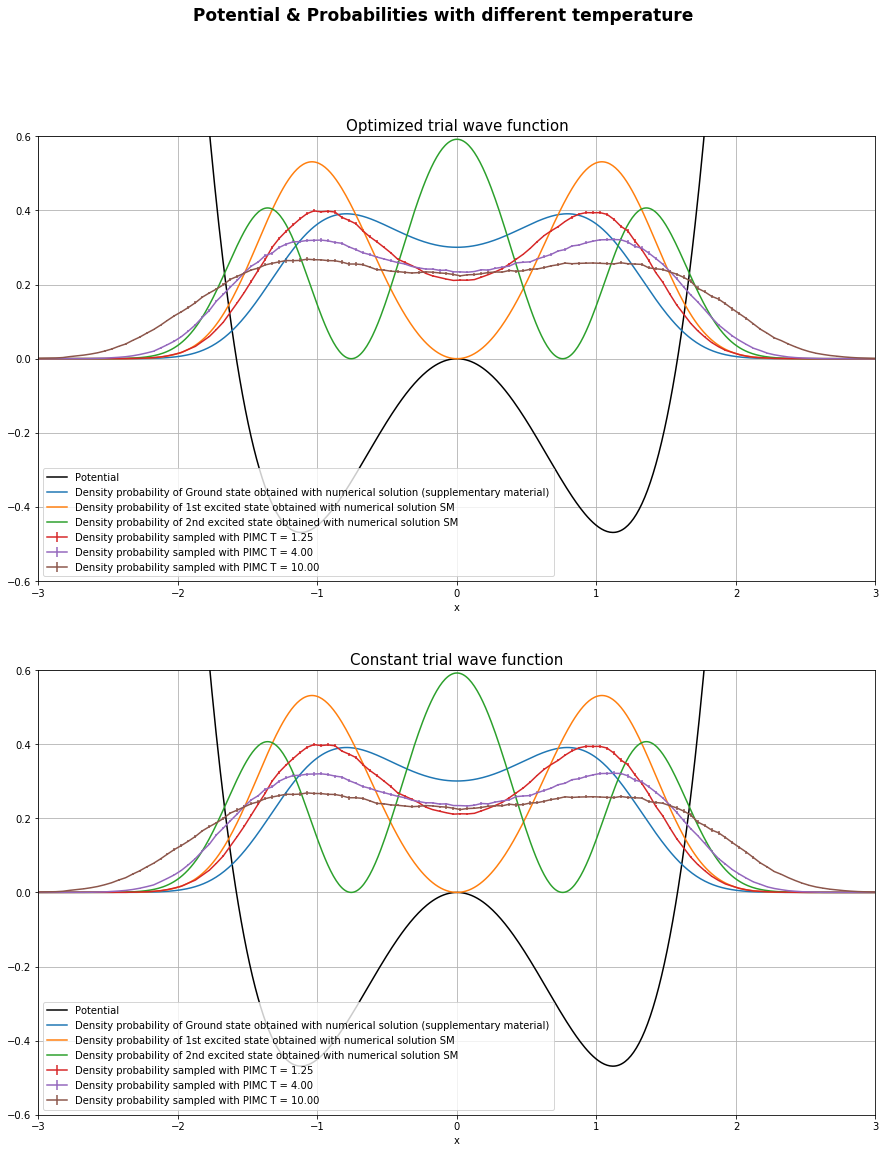

In [38]:
print ("1D quantum particle system confined by the external potential $V(x) = x^4 + (5/2)x^2$ ")

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

#optimized WF

# T1 = 1.25
x_pos_PIMC_gauss_T1, prob_PIMC_gauss_T1 , error_prob_PIMC_gauss_T1 = np.loadtxt("Results/probability_PIMC_gauss_T1.dat", usecols=(0,1,2), unpack='true')
# T2 = 4.0
x_pos_PIMC_gauss_T2, prob_PIMC_gauss_T2 , error_prob_PIMC_gauss_T2 = np.loadtxt("Results/probability_PIMC_gauss_T2.dat", usecols=(0,1,2), unpack='true')
# T1 = 10.0
x_pos_PIMC_gauss_T3, prob_PIMC_gauss_T3 , error_prob_PIMC_gauss_T3 = np.loadtxt("Results/probability_PIMC_gauss_T3.dat", usecols=(0,1,2), unpack='true')

fig=plt.figure(figsize=(15,18))
plt.suptitle("Potential & Probabilities with different temperature", fontsize='17', weight='bold')

plt.subplot(211)
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label = "Density probability of Ground state obtained with numerical solution (supplementary material)") 
plt.plot(x,(psi[1])**2,label = "Density probability of 1st excited state obtained with numerical solution SM")
plt.plot(x,(psi[2])**2, label = "Density probability of 2nd excited state obtained with numerical solution SM")
plt.errorbar(x_pos_PIMC_gauss_T1, prob_PIMC_gauss_T1 , yerr = error_prob_PIMC_gauss_T1, label = "Density probability sampled with PIMC T = 1.25")
plt.errorbar(x_pos_PIMC_gauss_T2, prob_PIMC_gauss_T2 , yerr = error_prob_PIMC_gauss_T2, label = "Density probability sampled with PIMC T = 4.00")
plt.errorbar(x_pos_PIMC_gauss_T3, prob_PIMC_gauss_T3 , yerr = error_prob_PIMC_gauss_T3, label = "Density probability sampled with PIMC T = 10.00")
plt.title("Optimized trial wave function", size='15')
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()

#constant WF

# T1 = 1.25
x_pos_PIMC_constant_T1, prob_PIMC_constant_T1 , error_prob_PIMC_constant_T1 = np.loadtxt("Results/probability_PIMC_constant_T1.dat", usecols=(0,1,2), unpack='true')
# T2 = 4.0
x_pos_PIMC_constant_T2, prob_PIMC_constant_T2 , error_prob_PIMC_constant_T2 = np.loadtxt("Results/probability_PIMC_constant_T2.dat", usecols=(0,1,2), unpack='true')
# T1 = 10.0
x_pos_PIMC_constant_T3, prob_PIMC_constant_T3 , error_prob_PIMC_constant_T3 = np.loadtxt("Results/probability_PIMC_constant_T3.dat", usecols=(0,1,2), unpack='true')

plt.subplot(212)
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label = "Density probability of Ground state obtained with numerical solution (supplementary material)") 
plt.plot(x,(psi[1])**2,label = "Density probability of 1st excited state obtained with numerical solution SM")
plt.plot(x,(psi[2])**2, label = "Density probability of 2nd excited state obtained with numerical solution SM")
plt.errorbar(x_pos_PIMC_constant_T1, prob_PIMC_constant_T1 , yerr = error_prob_PIMC_constant_T1, label = "Density probability sampled with PIMC T = 1.25")
plt.errorbar(x_pos_PIMC_constant_T2, prob_PIMC_constant_T2 , yerr = error_prob_PIMC_constant_T2, label = "Density probability sampled with PIMC T = 4.00")
plt.errorbar(x_pos_PIMC_constant_T3, prob_PIMC_constant_T3 , yerr = error_prob_PIMC_constant_T3, label = "Density probability sampled with PIMC T = 10.00")
plt.title("Constant trial wave function", size='15')
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()

plt.show()

- Si osserva che all'aumentare della temperatura la densità di probabiltà campionata si distribuisce su un supporto sempre più ampio, segno che il modulo quadro della funzione d'onda ,che l'algoritmo campiona, non è più quella del ground state ma quella di una miscela di stati popolati da diverse sovrapposizioni con i primi stati eccitati.